# Midterm Map: Examining Transit Oriented Districts through SB 535 Data

Throug the SB 535 Data we filtered cities that are near or within Transit Oriented Districts to examine what various communties face.

In [3]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

SB_535_Disadvantaged_Areas-2

In [4]:
sbda = gpd.read_file('SB_535_Disadvantaged_Areas-3.geojson')

Examining the data

In [5]:
type(sbda)

geopandas.geodataframe.GeoDataFrame

In [6]:
sbda.shape

(617, 65)

In [7]:
sbda.head()

,OBJECTID,GEOID10,Percentile_Range,Population,County,ZIP,City,CIscoreP,Ozone,Ozone_Pctl,...,African_American____,Native_American____,Asian_American____,Other____,MPO,Year,Disadv,Shapearea,Shapelen,geometry
0,1611,6037573003,91-95%,1802,Los Angeles,90806,Long Beach,91,0.042,32,...,14.8,0.4,16.9,2.6,SCAG,2017,yes,4.494828e+05,2746.197982,"POLYGON ((-118.19925 33.79704, -118.20542 33.7..."
1,1613,6037570403,96-100% (highest scores),4587,Los Angeles,90805,Long Beach,96,0.042,32,...,15.3,0.1,4.4,0.9,SCAG,2017,yes,5.715884e+05,3221.874355,"POLYGON ((-118.20057 33.88136, -118.20889 33.8..."
2,1621,6037544002,76-80%,3142,Los Angeles,90810,Long Beach,76,0.042,32,...,4.5,0.1,18.7,2.3,SCAG,2017,yes,1.145545e+06,4536.443471,"POLYGON ((-118.21661 33.83253, -118.22555 33.8..."
3,1622,6037544001,81-85%,4791,Los Angeles,90810,Long Beach,85,0.042,32,...,7.3,0.1,14.8,1.6,SCAG,2017,yes,2.284544e+06,6348.219474,"POLYGON ((-118.20756 33.83984, -118.20592 33.8..."
4,1623,6037543905,86-90%,4510,Los Angeles,90745,Carson,89,0.042,32,...,9.7,0.2,9.3,1.2,SCAG,2017,yes,2.746865e+06,7387.411179,"POLYGON ((-118.26227 33.80462, -118.25645 33.8..."


In [8]:
sbda.info

<bound method DataFrame.info of      OBJECTID     GEOID10          Percentile_Range  Population       County  \
0        1611  6037573003                    91-95%        1802  Los Angeles   
1        1613  6037570403  96-100% (highest scores)        4587  Los Angeles   
2        1621  6037544002                    76-80%        3142  Los Angeles   
3        1622  6037544001                    81-85%        4791  Los Angeles   
4        1623  6037543905                    86-90%        4510  Los Angeles   
..        ...         ...                       ...         ...          ...   
612      3874  6037219300  96-100% (highest scores)        3700  Los Angeles   
613      3875  6037220000                    86-90%        5345  Los Angeles   
614      3883  6037542104                    91-95%        3524  Los Angeles   
615      3884  6037542103                    86-90%        4114  Los Angeles   
616      3907  6037530006                    76-80%        3963  Los Angeles   

       

Okay perfect! It took a while to make sure I filtered the proper cities for the data

<AxesSubplot:>

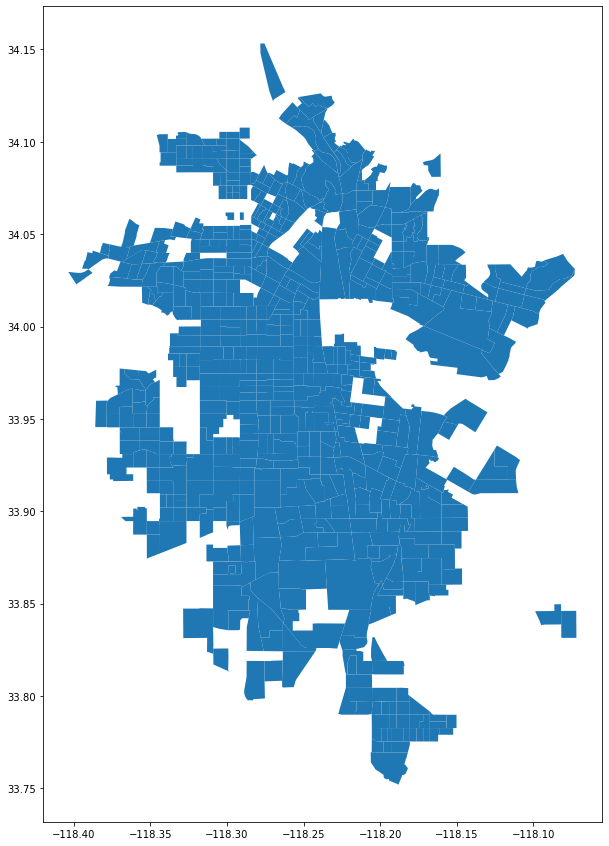

In [9]:
sbda.plot(figsize=(15,15))

In [10]:
sbda['City'].value_counts()

Los Angeles        380
Long Beach          57
Compton             29
Inglewood           21
Huntington Park     21
South Gate          16
Gardena             16
Hawthorne           15
Carson              12
Montebello          12
Lynwood             11
Paramount           10
Downey               6
Torrance             5
Lawndale             3
Lakewood             2
Monterey Park        1
Name: City, dtype: int64

Understasing the value count and the different cities we captures

In [11]:
sbda['County'].value_counts()

Los Angeles    617
Name: County, dtype: int64

Here's a test to the different columns

In [12]:
sbda[['Population', 'Ozone','Ozone_Pctl','City','ZIP']]  

,Population,Ozone,Ozone_Pctl,City,ZIP
0,1802,0.042,32,Long Beach,90806
1,4587,0.042,32,Long Beach,90805
2,3142,0.042,32,Long Beach,90810
3,4791,0.042,32,Long Beach,90810
4,4510,0.042,32,Carson,90745
...,...,...,...,...,...
612,3700,0.046,53,Los Angeles,90018
613,5345,0.046,53,Los Angeles,90016
614,3524,0.044,40,Compton,90221
615,4114,0.044,40,Compton,90221


Seeing the columns and what would be best capture in chart or map

In [13]:
sbda.columns.to_list()

['OBJECTID',
 'GEOID10',
 'Percentile_Range',
 'Population',
 'County',
 'ZIP',
 'City',
 'CIscoreP',
 'Ozone',
 'Ozone_Pctl',
 'PM2_5',
 'PM_2_5_Pctl',
 'Diesel_PM_Pctl',
 'DrinkingWater_Pctl',
 'Pesticides',
 'Pesticides_Pctl',
 'Tox_Releases',
 'Tox_Releases_Pctl',
 'Traffic',
 'Traffic_Pctl',
 'Cleanups',
 'Cleanups_Pctl',
 'GroundwaterThreats',
 'GroundWater_Threats_Pctl',
 'Haz_Waste',
 'Haz_Waste_Pctl',
 'Imp__Water_Bodies',
 'Imp__Water_Bodies_Pctl',
 'Solid_Waste',
 'Solid_Waste_Pctl',
 'PollutionScore',
 'Pollution_Burden_Pctl',
 'Asthma',
 'Asthma_Pctl',
 'Low_Birth_Weight',
 'Low_Birth_Weight_Pctl',
 'Cardiovascular',
 'Cardiovascular_Pctl',
 'Education',
 'Education_Pctl',
 'Linguistic_Isolation',
 'Linguistic_Isolation_Pctl',
 'Poverty',
 'Poverty_Pctl',
 'Unemployment',
 'Unemployment_Pctl',
 'Housing_Burden',
 'Housing_Burden_Pctl',
 'PopCharScore',
 'Pop__Characteristics_Pctl',
 'Children___10____',
 'Pop_11_64_years____',
 'Elderly___65____',
 'Hispanic____',
 'White_

'Housing_Burden_Pctl'
'Asthma_Pctl'
'Traffic_Pctl'
'Ozone_Pctl'

I began to outline the boudaries to make sure I have all the cities I filtered that are near or within transit oriented distircts

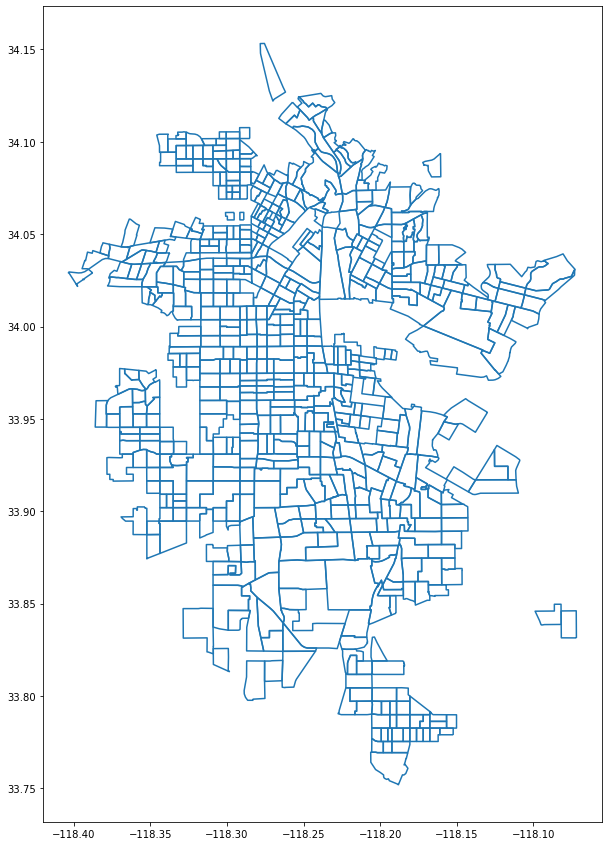

In [14]:
sbda.boundary.plot(figsize = (15,15));

## Housing Burden Percentile for Cities Near Transit Oriented Districts

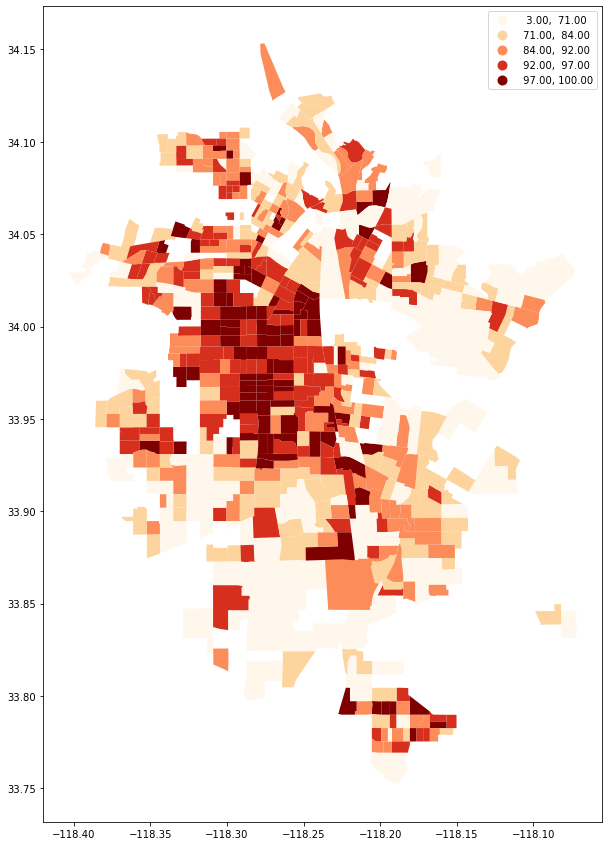

In [15]:
sbda.plot(
    column='Housing_Burden_Pctl', 
    legend = True,
    cmap='OrRd', 
    scheme='quantiles',
    figsize = (15,15),
);

In [16]:
## Ozone Percentile for Cities Near Transit Oriented Districts

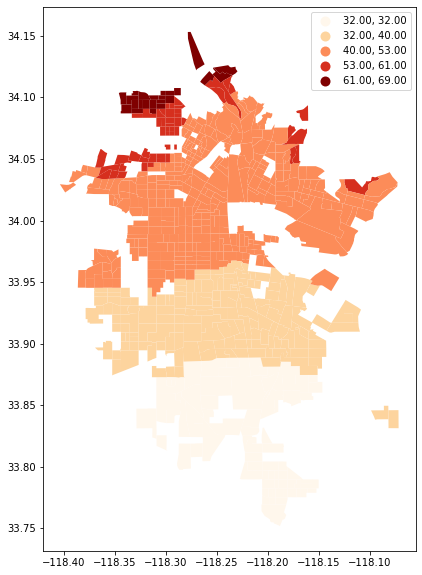

In [65]:
sbda.plot(
    column='Ozone_Pctl', 
    legend = True,
    cmap='OrRd', 
    scheme='NaturalBreaks',
    figsize = (12,10),
);

## Asthma Percentile for Cities Near Transit Oriented Districts

Since we are examining the TOD's using a choleropath first help see the high percentage , here we see a major area where people have asthma, If we overlay a basemap it can potentially show the freeways in the areas 

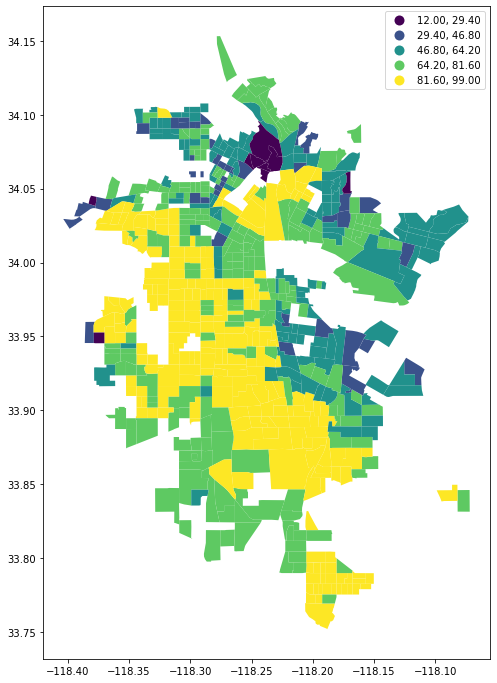

In [66]:
sbda.plot(
    column= 'Asthma_Pctl', 
    legend=True,
    scheme= "equal_interval",
    figsize=(15, 12),
    
 );

<AxesSubplot:title={'center':'Cities near Transit Oriented Districts Asthma Percentile'}, ylabel='Frequency'>

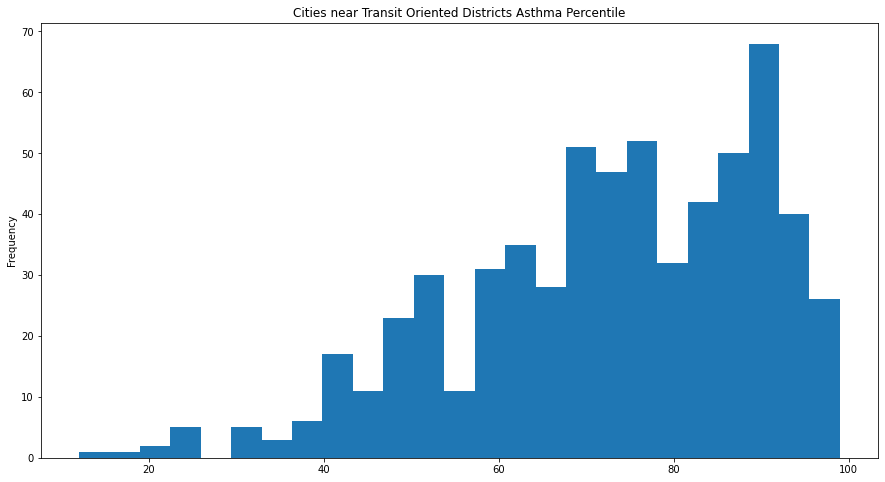

In [67]:
sbda['Asthma_Pctl'].plot.hist(figsize=(15,8),bins= 25, title='Cities near Transit Oriented Districts Asthma Percentile')

In [ ]:
Plotting the Ashthma frequency 

In [ ]:
Here we are plotting a Histogram on the Asthma Percentile, I am personally having trouble capturing the x title - potentialy needs to subset the data

## Traffic Percentile for Cities Near Transit Oriented Districts

Here we are tinkering with Chlorepath Maps and the various percentile seen in the Disadvantage communities

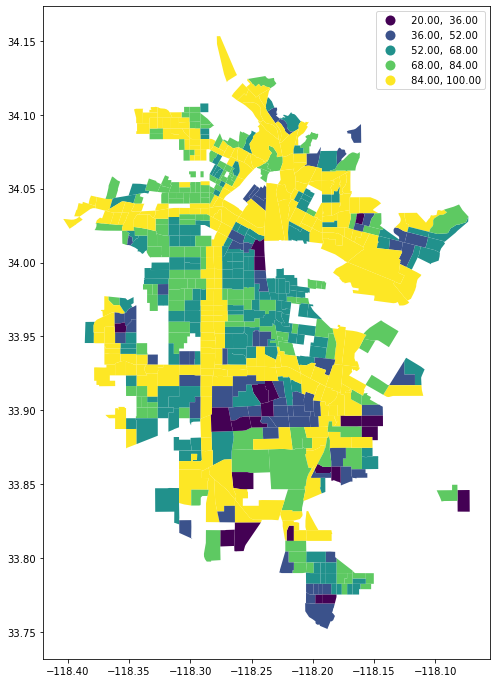

In [35]:
sbda.plot(
    column= 'Traffic_Pctl', 
    legend=True,
    scheme= "equal_interval",
    figsize=(12, 12),
 );

In [ ]:
Highlighting the ozone frequnecy 

<AxesSubplot:title={'center':'Cities near Transit Oriented Districts Ozone Percentile'}, ylabel='Frequency'>

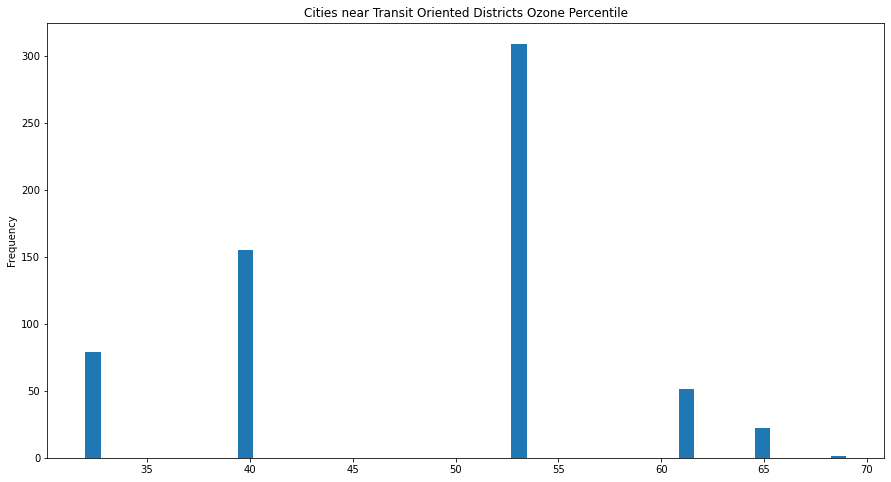

In [62]:
sbda['Ozone_Pctl'].plot.hist(figsize=(15,8),bins=50,title='Cities near Transit Oriented Districts Ozone Percentile')

<AxesSubplot:title={'center':'Cities near Transit Oriented Districts facing Housing Burden'}, ylabel='Frequency'>

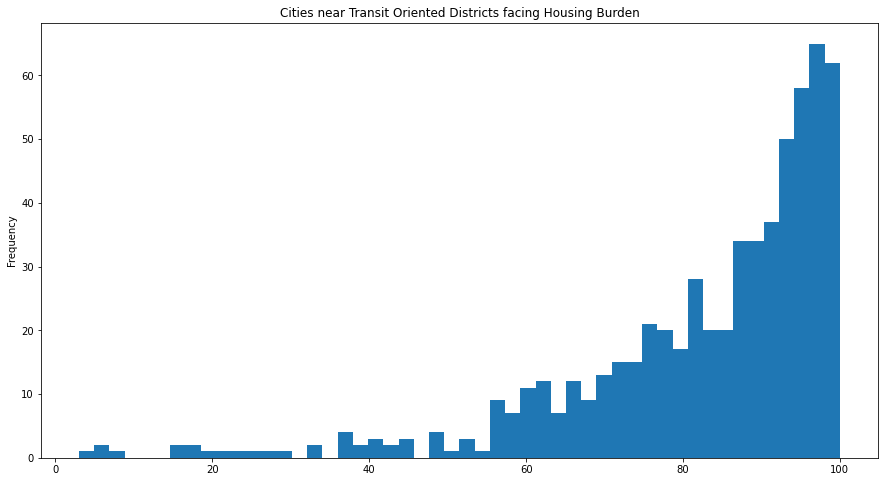

In [61]:
sbda['Housing_Burden_Pctl'].plot.hist(figsize=(15,8),bins=50, title='Cities near Transit Oriented Districts facing Housing Burden')

In [21]:
gdf_web_mercator = sbda.to_crs(epsg=3857)

Using Webmercator to add base maps!

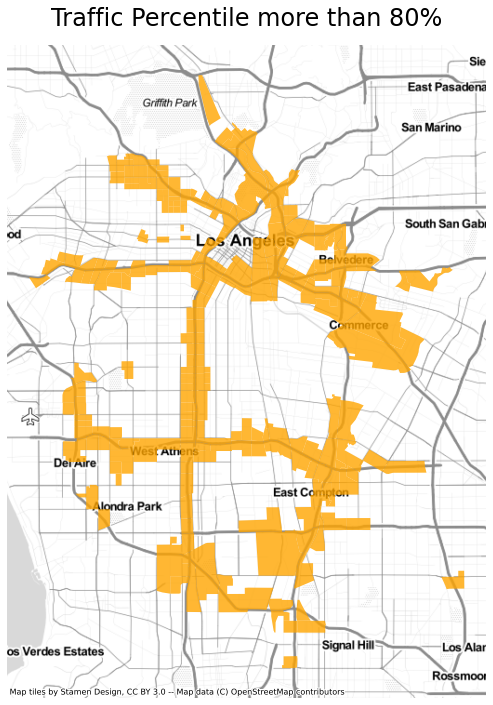

In [38]:
fig, ax = plt.subplots(figsize=(12, 12))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Traffic_Pctl'] > 80].plot(
                                                               ax=ax, 
                                                               color="orange",
                                                               alpha=0.8
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Traffic Percentile more than 80%',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

This is a great map for comparison with the cholrepath map

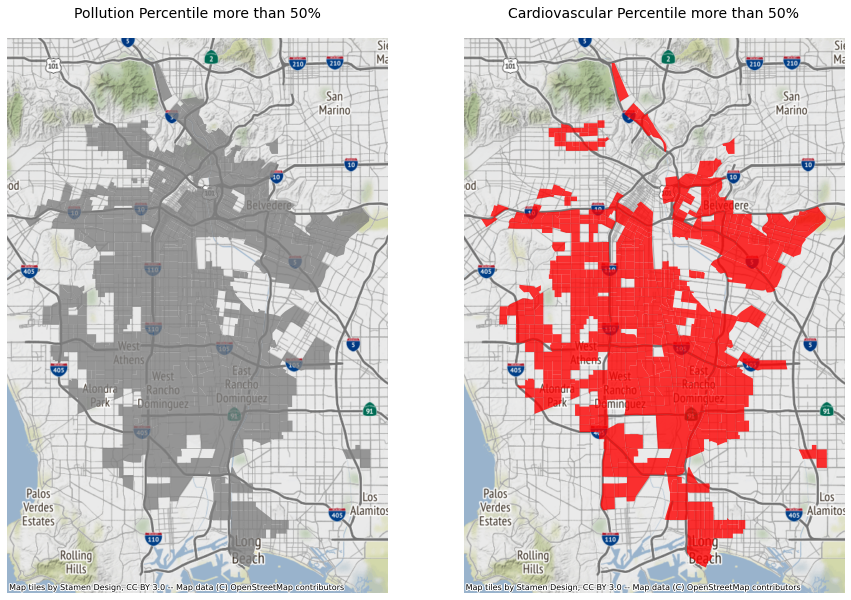

In [31]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12),sharex=True,sharey=True)

# name each subplot
ax1, ax2 = axs

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Pollution_Burden_Pctl'] > 50].plot(ax=ax1, 
                                                                           alpha=0.8, 
                                                                           color="grey")

ax1.axis("off")
ax1.set_title('Pollution Percentile more than 50%',fontsize=14, pad=20)

# add a basemap
ctx.add_basemap(ax1) # default zoom

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Cardiovascular_Pctl'] > 50].plot(ax=ax2, 
                                                                           alpha=0.8, 
                                                                           color="red")


ax2.axis("off")
ax2.set_title('Cardiovascular Percentile more than 50%',fontsize=14, pad=20)
# add a basemap
ctx.add_basemap(ax2) 


Next we made a subplot map! Great to compare with the pollution in the area and people facing cardivascular problems in the area